In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Data loading

In [4]:
df= pd.read_csv('AC_Data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       87840 non-null  object 
 1   AC 1    43708 non-null  float64
 2   AC 2    43711 non-null  float64
 3   AC 3    43713 non-null  float64
 4   AC 4    43704 non-null  float64
 5   AC 5    43716 non-null  float64
 6   AC 6    43717 non-null  float64
 7   AC 7    43679 non-null  float64
 8   AC 8    43704 non-null  float64
 9   AC 9    43654 non-null  float64
 10  AC 10   43690 non-null  float64
 11  AC 11   43670 non-null  float64
 12  AC 12   43713 non-null  float64
 13  AC 13   43719 non-null  float64
 14  AC 14   43696 non-null  float64
 15  AC 15   43715 non-null  float64
 16  AC 16   43710 non-null  float64
 17  AC 17   43714 non-null  float64
 18  AC 18   43723 non-null  float64
dtypes: float64(18), object(1)
memory usage: 12.7+ MB


In the above data set we have 17 float data type attributes and 1 object type

# EDA on AC data

**Converting '0' attribute into datetime data type and making a separate attribute**

In [6]:
df['Date']= pd.to_datetime(df['0'])
df.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Date
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,2019-08-01 00:00:00
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 00:01:00
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,2019-08-01 00:02:00
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 00:03:00
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,2019-08-01 00:04:00


In [7]:
df2=df.copy()

Storing 'Date' column into variable

In [8]:
date=df2['Date']

Droping '0' and 'Date' features

In [9]:
df2.drop(columns=['0','Date'],inplace=True)

**Droping those rows which have all the NaN values**

In [10]:
df3=df2.dropna(axis=0,how='all')

In [11]:
index=df3.index
index=list(index)

Saving those records of 'Date' columns which are not related to any records having NaN values

In [12]:
date=date.iloc[index]

Creating Individual columns for 'Date', 'Month','Weekday' and 'hours'

In [13]:
df3.insert(0, 'Date',date.dt.date)

In [14]:
df3.insert(1, 'time',date.dt.time)

In [15]:
df3.insert(2,'month',date.dt.month)

In [16]:
df3.insert(3,'weekday',date.dt.weekday)

In [17]:
df3.insert(4, 'hours',date.dt.hour)

**Chceking Unique values in the respective columns**

In [18]:
df3['month'].unique(),df3['weekday'].unique(),df3['hours'].unique()

(array([8, 9], dtype=int64),
 array([3, 4, 5, 6, 0, 1, 2], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23], dtype=int64))

**Mapping 'weekday' and 'month' columns with its name**

In [19]:
month={8:'August',9:'September'}
weekday={0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

In [20]:
df3['month']=df3['month'].map(month)

In [21]:
df3['weekday']=df3['weekday'].map(weekday)

**Making 'Date_index' as index column**

In [27]:
df3['month'].unique()

array(['August', 'September'], dtype=object)

In [28]:
df3['weekday'].unique()

array(['Thur', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

# Separating the datset monthwise

### August and Sepetember

In [29]:
df_aug=df3[df3['month']=='August']
df_sep=df3[df3['month']=='September']

**Reseting the index for dataframe of month september**

In [30]:
df_sep.reset_index(inplace=True,drop=True)

### Dealing with missing data**

**Above null values are from respective columns which do not have all the null values. They are present in between.**
**The reason may be, there may be a constant consumption of the power in betwene the respective timing**

In [31]:
df_aug[df_aug['AC 1'].isnull()==True][['Date','time']]

,Date,time
1946,2019-08-02,08:26:00
2532,2019-08-02,18:12:00
4546,2019-08-04,03:46:00
6106,2019-08-05,05:46:00
7602,2019-08-06,06:42:00
...,...,...
43091,2019-08-30,22:11:00
43253,2019-08-31,00:53:00
43535,2019-08-31,05:35:00
43659,2019-08-31,07:39:00


In [32]:
df_aug[df_aug['AC 2'].isnull()==True][['Date','time']]

,Date,time
2558,2019-08-02,18:38:00
3846,2019-08-03,16:06:00
4092,2019-08-03,20:12:00
6544,2019-08-05,13:04:00
7602,2019-08-06,06:42:00
...,...,...
41217,2019-08-29,14:57:00
41355,2019-08-29,17:15:00
41619,2019-08-29,21:39:00
43495,2019-08-31,04:55:00


### Checking the description of all the given attributes after removing the null values

**1. Description of Month- Augest**

In [33]:
df_aug.describe()

,hours,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,29872.000000,22163.000000,22172.000000,22172.000000,22165.000000,22170.000000,22172.000000,22146.000000,22159.000000,22128.000000,22157.000000,22141.000000,22169.000000,22175.000000,22158.000000,22168.000000,22165.000000,22174.000000,22173.000000
mean,11.588109,2.439157,4.137460,2.491926,2.442437,1.351592,2.298423,3.088841,2.458635,3.136123,1.616085,2.247772,2.645749,4.281050,2.754753,4.290998,3.046312,4.102575,6.531902
std,6.923935,2.277932,2.650321,1.360843,1.841525,0.765529,1.663891,1.395485,1.474772,1.499741,0.692936,1.474573,1.546242,1.826572,1.352079,1.922945,1.592044,1.219085,2.545083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,2.552271,1.787822,1.198197,0.928855,0.000000,2.303246,1.695245,2.276304,1.174572,1.496104,1.815708,3.263165,1.791628,3.385218,2.101473,3.513201,3.927677
50%,12.000000,2.097632,4.190472,2.483087,2.391232,1.327909,2.485927,3.098005,2.548660,3.015568,1.565039,2.249754,2.655350,4.201399,2.713049,4.249456,2.892032,4.573853,7.352866
75%,18.000000,3.725372,5.928137,3.271633,3.668566,1.787167,3.422533,3.952798,3.403172,3.980219,2.040749,3.072847,3.589674,5.352486,3.647521,5.451880,3.888782,4.920139,8.756898
max,23.000000,10.103019,10.609185,7.862882,9.728602,4.628349,8.944285,9.356776,8.019148,9.667248,4.625030,9.481944,9.399303,9.796393,8.488146,10.349998,10.654430,5.945302,10.378583


**2. Description of Month- September**

In [34]:
df_sep.describe()

,hours,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,22107.000000,21545.000000,21539.000000,21541.000000,21539.000000,21546.000000,21545.000000,21533.000000,21545.000000,21526.000000,21533.000000,21529.000000,21544.000000,21544.000000,21538.000000,21547.000000,21545.000000,21540.000000,21550.000000
mean,11.451803,2.317864,3.592431,2.647137,2.346505,1.493837,2.744247,2.869853,2.641354,3.233991,1.458349,2.569013,2.755091,4.278702,3.084165,3.794515,2.546702,4.338810,6.391448
std,6.931902,2.274012,2.401021,1.603720,1.749809,0.762268,1.616087,1.541808,1.528946,1.543591,0.668324,1.616517,1.310852,1.868172,1.535903,2.079398,1.581216,1.006272,2.058835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,1.912481,1.610332,1.332533,1.020205,1.888481,2.056722,1.833774,2.317231,1.058455,1.711451,2.067600,3.257623,1.924022,2.814804,1.661270,3.942532,4.355862
50%,11.000000,2.092213,3.352918,2.495287,2.233059,1.434495,2.855804,2.909024,2.662878,3.163550,1.436727,2.475975,2.791812,4.230953,2.881056,3.676494,2.457757,4.643703,7.012214
75%,17.000000,3.601834,4.880440,3.650930,3.286689,1.949980,3.790920,3.832704,3.591966,4.190504,1.893581,3.444426,3.549430,5.406647,4.052320,4.967388,3.459345,5.002043,7.917204
max,23.000000,11.194789,11.147141,8.430909,9.879500,5.495358,9.929291,9.259010,9.331506,10.026747,3.933426,10.363151,9.887306,9.618492,9.054969,9.945425,9.789502,5.950261,11.040031


# Find the Pattern in the data

**We will find out the pattern for separate month**

# 1) August

In [35]:
# check for null value:

df_aug.isnull().sum()

Date          0
time          0
month         0
weekday       0
hours         0
AC 1       7709
AC 2       7700
AC 3       7700
AC 4       7707
AC 5       7702
AC 6       7700
AC 7       7726
AC 8       7713
AC 9       7744
AC 10      7715
AC 11      7731
AC 12      7703
AC 13      7697
AC 14      7714
AC 15      7704
AC 16      7707
AC 17      7698
AC 18      7699
dtype: int64

**# Handling Remaining Null values in the dataset of month- August**

In [36]:
df_aug[df_aug['AC 2'].isnull()].head(20)

,Date,time,month,weekday,hours,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
2558,2019-08-02,18:38:00,August,Fri,18,0.000000,NaN,3.126462,1.783589,1.994202,1.952526,2.462356,0.000000,2.537304,0.000000,0.000000,2.086206,2.862392,2.543196,4.093409,1.945377,4.799008,8.294102
3846,2019-08-03,16:06:00,August,Sat,16,2.607227,NaN,2.361324,2.373730,2.059746,0.000000,4.349778,0.000000,2.686354,1.452776,0.000000,3.173821,6.028495,1.232194,3.876868,2.579346,4.545241,9.173691
4092,2019-08-03,20:12:00,August,Sat,20,1.514545,NaN,2.459517,2.526411,0.000000,2.140305,2.688282,2.624526,2.052818,1.262161,0.000000,3.512281,2.725316,1.611700,3.706263,2.245467,4.730628,9.369068
6544,2019-08-05,13:04:00,August,Mon,13,0.000000,NaN,1.787066,0.000000,0.915024,2.946652,0.000000,0.000000,2.306382,0.948755,2.423699,0.000000,4.145112,1.256952,9.584856,6.562647,4.232205,4.122882
7602,2019-08-06,06:42:00,August,Tue,6,NaN,NaN,2.045683,NaN,NaN,NaN,4.808459,NaN,3.462420,NaN,3.737873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7603,2019-08-06,06:43:00,August,Tue,6,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
7619,2019-08-06,06:59:00,August,Tue,6,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
7838,2019-08-06,10:38:00,August,Tue,10,0.000000,NaN,0.000000,0.000000,1.539358,2.789925,0.000000,0.000000,1.902128,1.249299,0.000000,2.072948,5.018498,1.008709,3.013413,0.000000,4.408086,8.868554
8578,2019-08-06,22:58:00,August,Tue,22,2.254651,NaN,2.888042,1.648818,3.132153,3.956301,4.126125,2.533775,4.532350,2.330935,4.151199,3.078675,5.940638,6.181845,0.413047,3.438869,4.426514,8.895030
8984,2019-08-07,05:44:00,August,Wed,5,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN


**# From the above dataset**

1. 0 value is before and after NaN value: Means Nan is not equal to 0. Means NaN is not showing any zero consumption. 
2. Non null value after 0: It means that there is no correlation between prior 0 and consecutive NaN value
3. Non null value before NaN value: Means there could be a chance of zero consumption.
4. Non null values are before and after NaN and they both are different: Means there is no way that NaN values means there is zero consumption of power.

Conlusion: These NaN values are because of some other reasons:
        - Technical glich
        - Incoming data is not valid(software issue)
        - Man mishandling
        
So instead of droping them we will change them with the corresponding neighbours using KNN imputer

In [37]:
month_week_aug=df_aug[['Date','time','month','weekday','hours']]

In [38]:
from sklearn.impute import KNNImputer

In [39]:
imputer = KNNImputer(n_neighbors = 5)
impute_data = imputer.fit_transform(df_aug.iloc[:,5:])
df_aug1 = pd.DataFrame(impute_data,columns = df_aug.columns[5:],index=df_aug.index)
for feature in df_aug1.columns:
    df_aug1[feature]=df_aug1[feature].apply(lambda a: round(a,2))

In [41]:
df_aug=pd.concat([month_week_aug,df_aug1],axis=1)

In [42]:
df_aug.isnull().sum()

Date       0
time       0
month      0
weekday    0
hours      0
AC 1       0
AC 2       0
AC 3       0
AC 4       0
AC 5       0
AC 6       0
AC 7       0
AC 8       0
AC 9       0
AC 10      0
AC 11      0
AC 12      0
AC 13      0
AC 14      0
AC 15      0
AC 16      0
AC 17      0
AC 18      0
dtype: int64

### Grouping w.r.t. Different different columns: August

**1. Month Wise Power consumption w.r.t individual AC unit**

In [43]:
month_aug_kwh=df_aug.groupby('month').sum().iloc[:,1:].T
month_aug_kwh.reset_index(inplace=True)

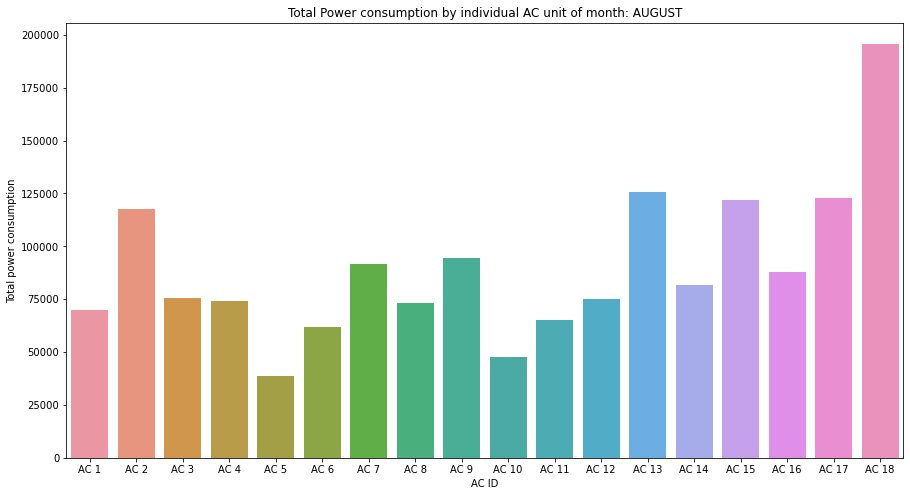

In [44]:
plt.figure(figsize=(15,8))
sns.barplot(x="index", y="August", data=month_aug_kwh)
plt.title('Total Power consumption by individual AC unit of month: AUGUST')
plt.xlabel('AC ID')
plt.ylabel('Total power consumption')
plt.savefig('./Plots/Total_Power_consumption_by_individual_AC_unit_of_month_AUGUST.jpg')

**2. Hours Wise Power consumption w.r.t individual AC unit**

In [45]:
df_aug['hours'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [46]:
hourly_aug_kwh=df_aug.groupby('hours').sum()
hourly_aug_kwh.reset_index(inplace=True)

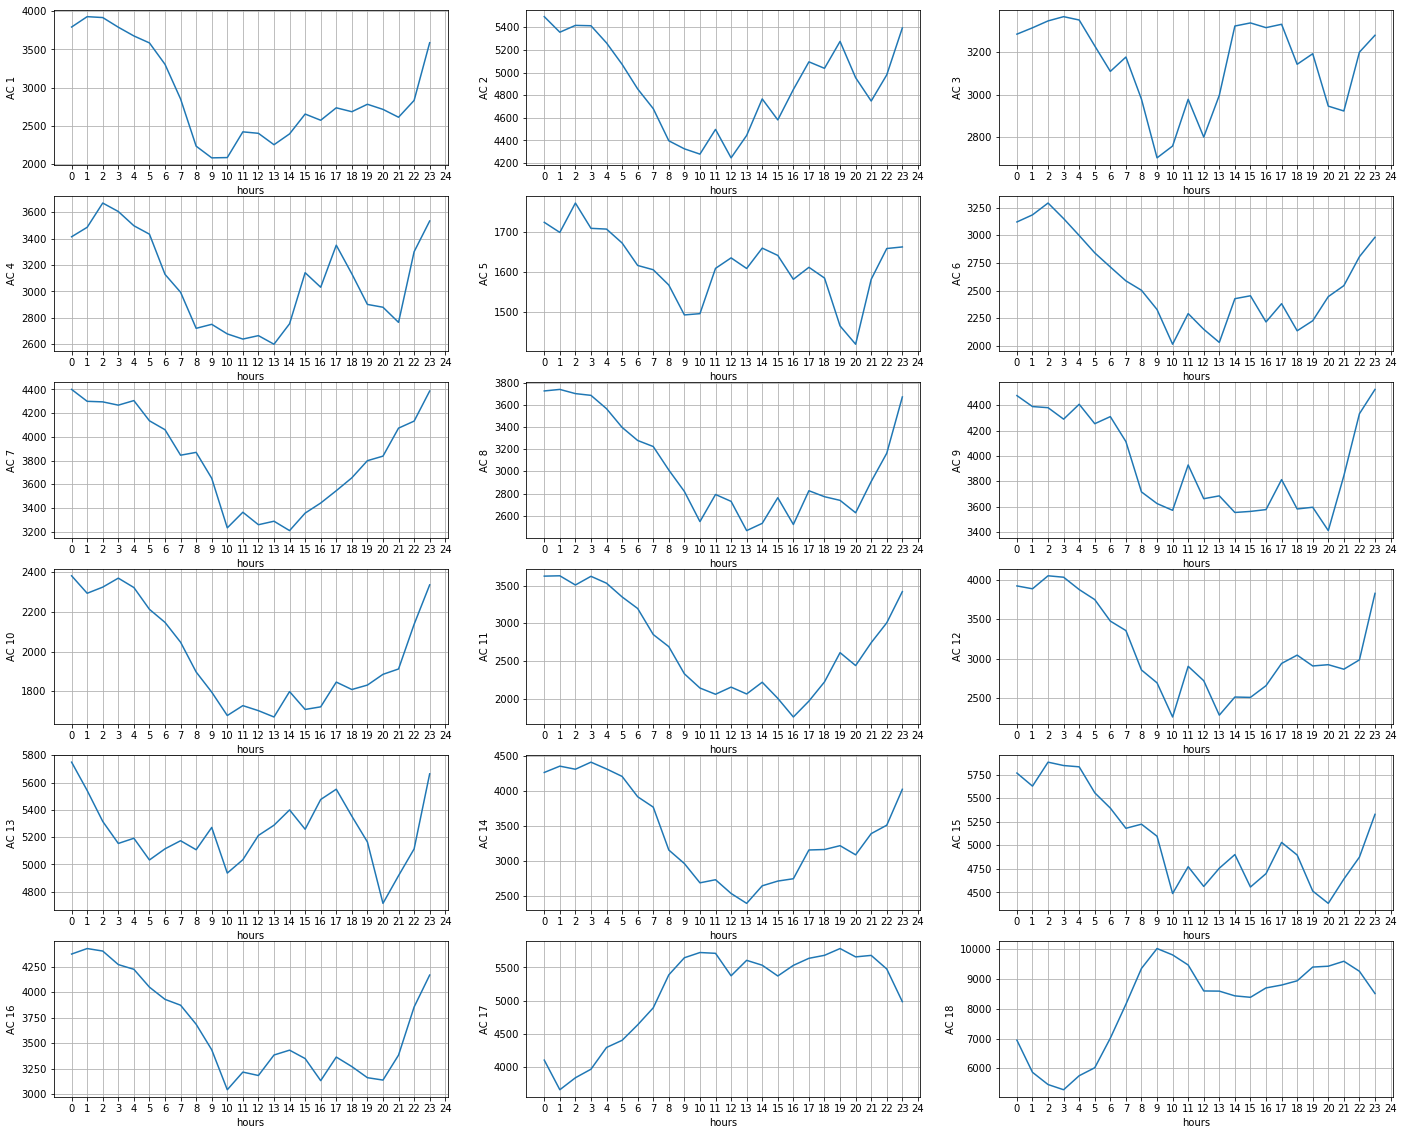

In [48]:
plt.figure(figsize=(24,20))
plot=1
x=np.arange(0,25,1)

for i in list(hourly_aug_kwh.columns[1:]):
    plt.subplot(6,3,plot)
    sns.lineplot(y=i, x="hours", data=hourly_aug_kwh)
    plt.xticks(x)
    
    plt.grid()
    plot+=1
plt.savefig('./Plots/AC_vs_Hourly_consumption_August.jpg')

**3. Weekday Wise Power consumption w.r.t running hours**

In [49]:
weekday_aug_kwh=df_aug.groupby('weekday').sum()
weekday_aug_kwh.reset_index(inplace=True)

In [50]:
weekday_aug_kwh['Total_kwh']=weekday_aug_kwh.sum(axis=1)

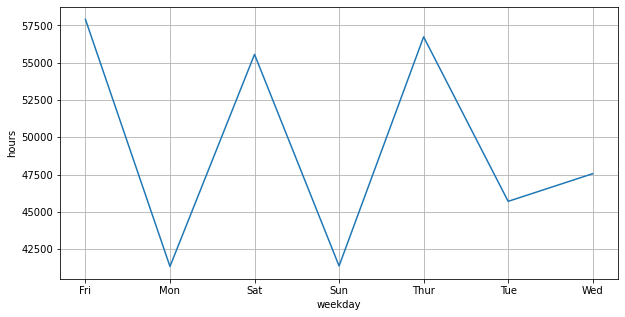

In [51]:
plt.figure(figsize=(10,5))
sns.lineplot(x="weekday",y="hours",data=weekday_aug_kwh)
plt.grid()
plt.savefig('./Plots/weekday_vs_hours_August.jpg')

**4. Weekday Wise Power consumption w.r.t Total Kwh consume**

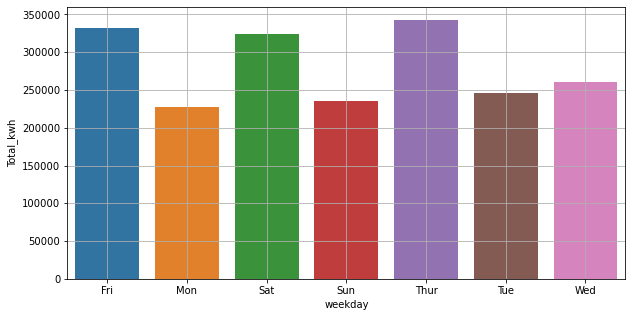

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(x="weekday",y="Total_kwh",data=weekday_aug_kwh)
plt.grid()
plt.savefig('./Plots/weekday_vs_Total_kwh_August.jpg')

**5. Hour wise total power consumption**

In [53]:
columns=list(hourly_aug_kwh.columns[1:])

In [54]:
hourly_aug_kwh['Total_kwh_per_hour']=hourly_aug_kwh.iloc[:,1:].sum(axis=1)

Text(0.5, 1.0, 'Overall_power_consumption_of_all_AC Unit_per_Hour')

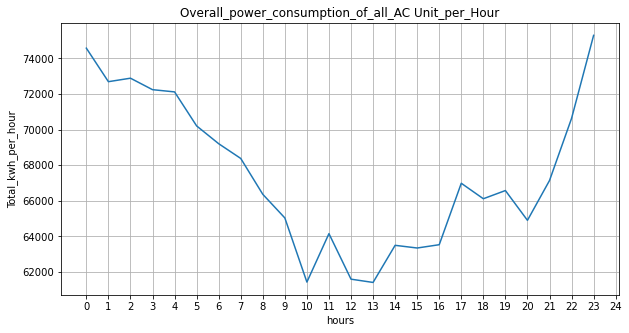

In [55]:
# sns.color_palette("hsl", 1)
plt.figure(figsize=(10,5))
sns.lineplot(x="hours",y="Total_kwh_per_hour",data=hourly_aug_kwh)
plt.xticks(np.arange(0,25,1))
plt.grid()
plt.savefig('./Plots/hours_vs_Total_kwh_per_hour_August.jpg')
plt.title('Overall_power_consumption_of_all_AC Unit_per_Hour')

**6. Date wise w.r.t. total power consumption**

In [56]:
datewise_aug_kwh=df_aug.groupby('Date').sum().iloc[:,1:]

In [57]:
datewise_aug_kwh['Total_kwh_per_day']=datewise_aug_kwh.sum(axis=1)

Text(0.5, 1.0, 'Overall_power_consumption_of_all_AC Unit_per_day')

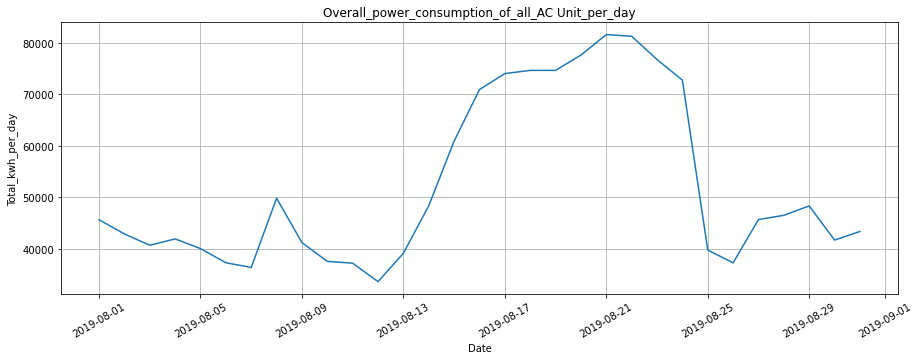

In [60]:
# sns.color_palette("hsl", 1)
plt.figure(figsize=(15,5))
sns.lineplot(x=datewise_aug_kwh.index,y="Total_kwh_per_day",data=datewise_aug_kwh)
# plt.xticks(np.arange(0,32,1))
plt.grid()
plt.xticks(rotation=30)
plt.savefig('./Plots/day_vs_Total_kwh_per_day_August.jpg')
plt.title('Overall_power_consumption_of_all_AC Unit_per_day')

### Minimum and Maximum Power consumed by AC unit

In [61]:
ac_df=datewise_aug_kwh.T.iloc[:-1,:]

In [62]:
ac_df['Total_kwh_by_AC']=ac_df.sum(axis=1)

In [63]:
ac_df['Total_kwh_by_AC'].sort_values(ascending=True).nsmallest(1)

AC 5    38770.49
Name: Total_kwh_by_AC, dtype: float64

In [64]:
ac_df['Total_kwh_by_AC'].sort_values(ascending=True).nlargest(1)

AC 18    195808.45
Name: Total_kwh_by_AC, dtype: float64

**Minimum Power consumed by: AC 5**

**Maximum Power consumed by: AC 18**

# 2) Sepetember

In [65]:
# check for null value:

df_sep.isnull().sum()

Date         0
time         0
month        0
weekday      0
hours        0
AC 1       562
AC 2       568
AC 3       566
AC 4       568
AC 5       561
AC 6       562
AC 7       574
AC 8       562
AC 9       581
AC 10      574
AC 11      578
AC 12      563
AC 13      563
AC 14      569
AC 15      560
AC 16      562
AC 17      567
AC 18      557
dtype: int64

**# Handling Remaining Null values in the dataset of month- September**

In [66]:
df_sep[df_sep['AC 2'].isnull()].head(20)

,Date,time,month,weekday,hours,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
50,2019-09-01,01:41:00,September,Sun,1,5.411981,NaN,0.000000,3.371780,1.932372,2.675382,3.395568,3.864713,2.860604,2.522155,2.180402,3.173243,4.718458,2.797433,6.110252,2.880973,4.376375,3.604104
607,2019-09-01,20:15:00,September,Sun,20,0.000000,NaN,1.299269,1.542389,0.082791,1.587928,3.236165,3.405566,3.131050,1.188200,0.000000,0.000000,4.744688,1.759637,4.272686,3.474461,4.949192,9.181624
632,2019-09-01,21:05:00,September,Sun,21,3.616452,NaN,1.463094,2.155377,0.870676,1.405594,2.364099,0.000000,2.248203,1.386080,0.000000,0.000000,3.393295,2.429201,3.431640,1.596222,4.953582,7.913702
1511,2019-09-03,02:33:00,September,Tue,2,0.000000,NaN,1.362359,2.347755,2.103109,3.682973,5.101642,5.063750,4.327300,1.869682,2.788853,3.255408,3.318001,4.784170,2.910135,1.122365,4.230619,3.869207
1620,2019-09-03,06:11:00,September,Tue,6,0.000000,NaN,1.032246,1.785486,2.860660,2.058206,3.363392,2.918466,4.262333,0.708029,1.272409,3.352148,1.736324,4.626978,2.884792,0.000000,4.341327,3.563080
2147,2019-09-03,23:45:00,September,Tue,23,0.000000,NaN,0.000000,1.923364,2.754729,1.295685,4.464021,3.313041,3.950536,1.249538,3.499155,2.484567,3.618871,6.609854,2.909557,1.120682,5.005760,7.487674
3086,2019-09-05,07:03:00,September,Thur,7,0.000000,NaN,0.995298,2.215029,2.082978,4.223807,4.978038,2.225052,2.172188,1.093363,2.212789,3.533815,4.371866,4.506867,2.918244,1.639362,4.496819,3.822992
3758,2019-09-06,05:31:00,September,Fri,5,0.000000,NaN,1.097900,2.825185,1.849560,2.791720,1.849309,2.433448,1.248640,1.551408,3.123665,1.890351,4.903000,4.577425,2.492564,0.000000,4.279326,3.830861
3773,2019-09-06,06:01:00,September,Fri,6,NaN,NaN,1.150979,NaN,NaN,NaN,1.467577,NaN,4.197598,NaN,2.048980,NaN,NaN,4.565226,NaN,NaN,0.000000,0.000000
3943,2019-09-06,11:41:00,September,Fri,11,0.000000,NaN,1.040938,3.335351,1.849239,4.615778,3.986610,5.354501,3.755843,0.000000,0.000000,3.838349,6.175501,3.276843,3.303177,1.778456,5.550831,5.133247


**# From the above dataset**

1. 0 value is before and after NaN value: Means Nan is not equal to 0. Means NaN is not showing any zero consumption. 
2. Non null value after 0: It means that there is no correlation between prior 0 and consecutive NaN value
3. Non null value before NaN value: Means there could be a chance of zero consumption.
4. Non null values are before and after NaN and they both are different: Means there is no way that NaN values means there is zero consumption of power.

Conlusion: These NaN values are because of some other reasons:

        - Technical glich
        
        - Incoming data is not valid(software issue)
        
        - Man mishandling
        
So instead of droping them we will change them with the corresponding neighbours using KNN imputer

In [67]:
month_week_sep=df_sep[['Date','time','month','weekday','hours']]

In [68]:
from sklearn.impute import KNNImputer

In [69]:
imputer = KNNImputer(n_neighbors = 5)
impute_data = imputer.fit_transform(df_sep.iloc[:,5:])
df_sep1 = pd.DataFrame(impute_data,columns = df_sep.columns[5:],index=df_sep.index)
for feature in df_sep1.columns:
    df_sep1[feature]=df_sep1[feature].apply(lambda a: round(a,2))

In [70]:
df_sep=pd.concat([month_week_sep,df_sep1],axis=1)

In [71]:
df_sep.isnull().sum()

Date       0
time       0
month      0
weekday    0
hours      0
AC 1       0
AC 2       0
AC 3       0
AC 4       0
AC 5       0
AC 6       0
AC 7       0
AC 8       0
AC 9       0
AC 10      0
AC 11      0
AC 12      0
AC 13      0
AC 14      0
AC 15      0
AC 16      0
AC 17      0
AC 18      0
dtype: int64

### Grouping w.r.t. Different different columns: September

**1. Month Wise Power consumption w.r.t individual AC unit**

In [72]:
month_sep_kwh=df_sep.groupby('month').sum().iloc[:,1:].T
month_sep_kwh.reset_index(inplace=True)

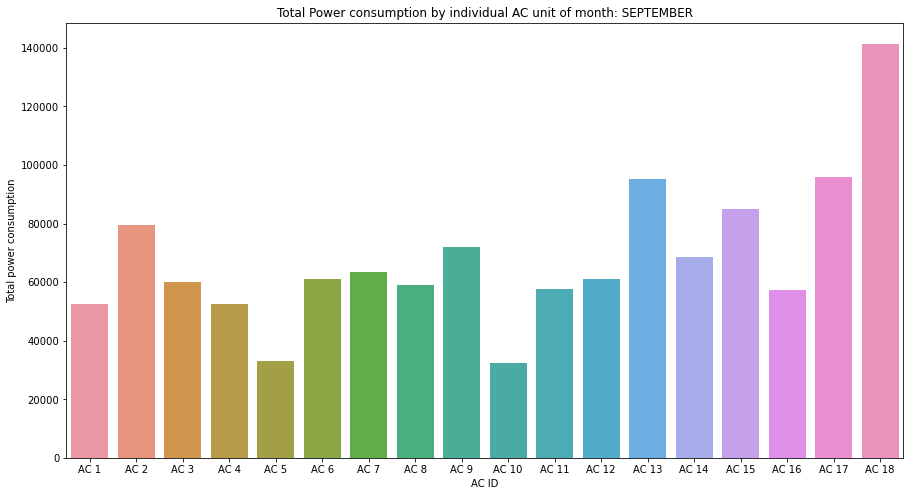

In [73]:
plt.figure(figsize=(15,8))
sns.barplot(x="index", y="September", data=month_sep_kwh)
plt.title('Total Power consumption by individual AC unit of month: SEPTEMBER')
plt.xlabel('AC ID')
plt.ylabel('Total power consumption')
plt.savefig('./Plots/Total_Power_consumption_by_individual_AC_unit_of_month_SEPTEMBER.jpg')

**2. Hours Wise Power consumption w.r.t individual AC unit**

In [74]:
df_sep['hours'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [75]:
hourly_sep_kwh=df_sep.groupby('hours').sum()
hourly_sep_kwh.reset_index(inplace=True)

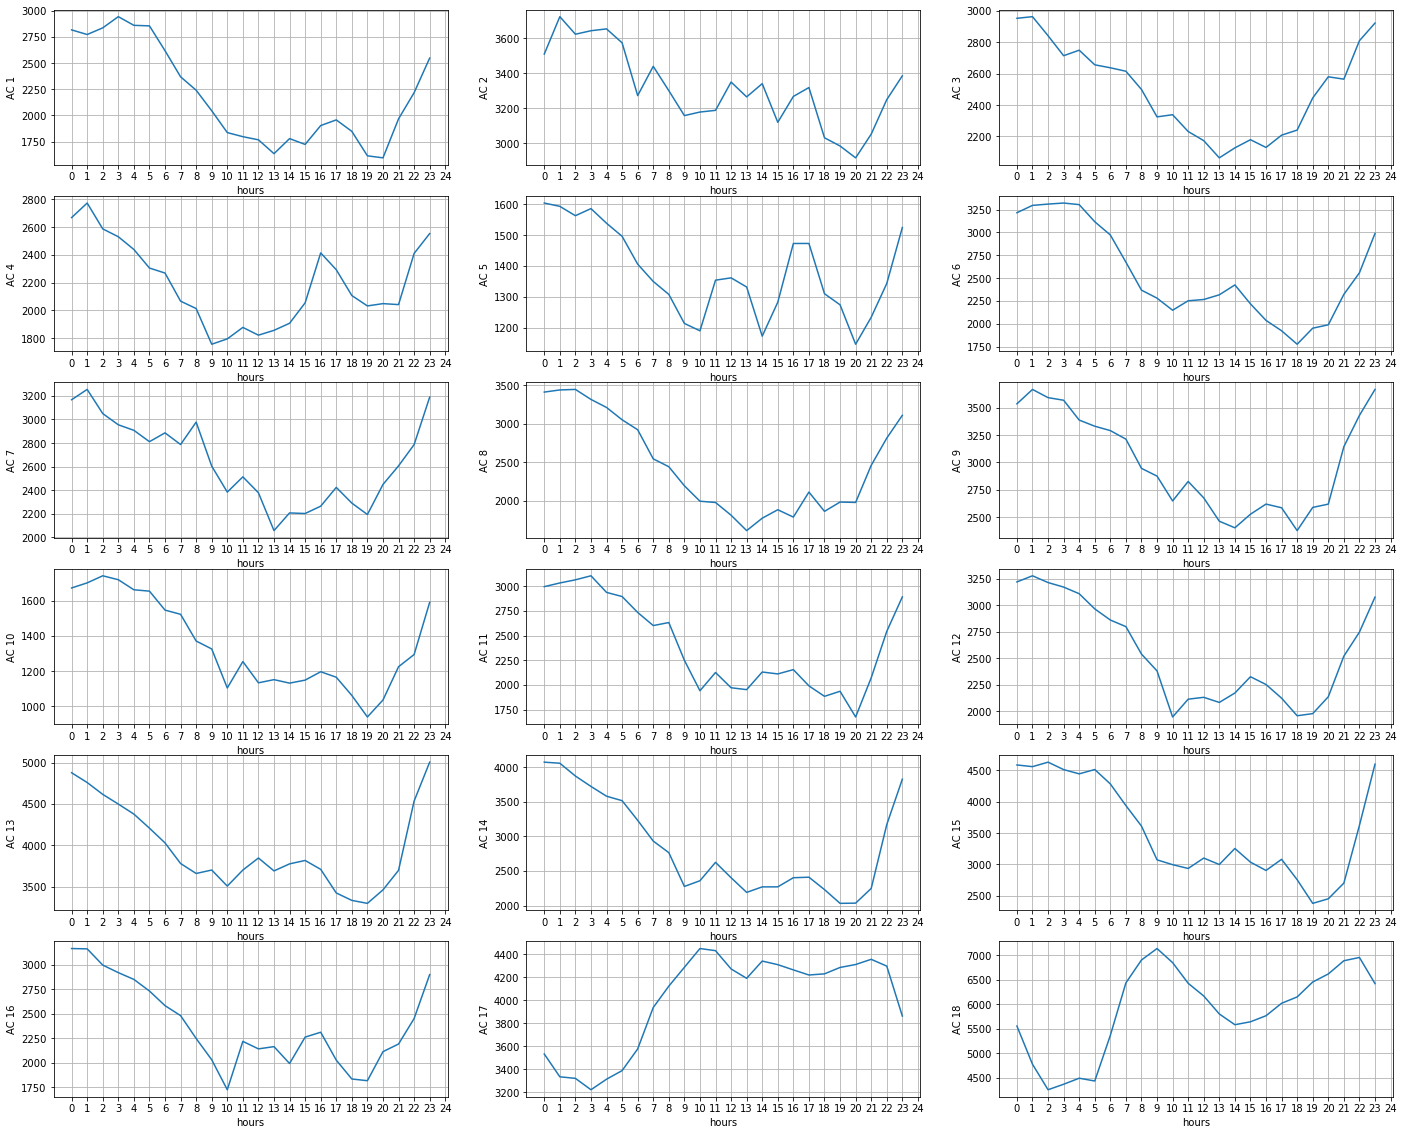

In [76]:
plt.figure(figsize=(24,20))
plot=1
x=np.arange(0,25,1)

for i in list(hourly_sep_kwh.columns[1:]):
    plt.subplot(6,3,plot)
    sns.lineplot(y=i, x="hours", data=hourly_sep_kwh)
    plt.xticks(x)
    
    plt.grid()
    plot+=1
plt.savefig('./Plots/AC_vs_Hourly_consumption_September.jpg')

**3. Weekday Wise Power consumption w.r.t running hours**

In [77]:
weekday_sep_kwh=df_sep.groupby('weekday').sum()
weekday_sep_kwh.reset_index(inplace=True)

In [78]:
weekday_sep_kwh['Total_kwh']=weekday_sep_kwh.sum(axis=1)

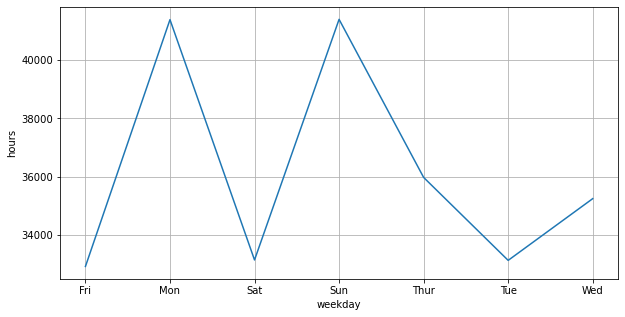

In [79]:
plt.figure(figsize=(10,5))
sns.lineplot(x="weekday",y="hours",data=weekday_sep_kwh)
plt.grid()
plt.savefig('./Plots/weekday_vs_hours_September.jpg')

**4. Weekday Wise Power consumption w.r.t Total Kwh consume**

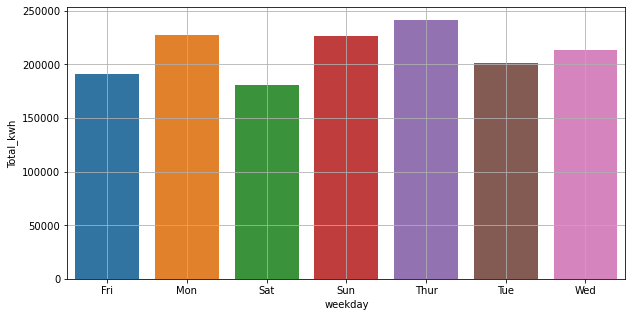

In [80]:
plt.figure(figsize=(10,5))
sns.barplot(x="weekday",y="Total_kwh",data=weekday_sep_kwh)
plt.grid()
plt.savefig('./Plots/weekday_vs_Total_kwh_September.jpg')

**5. Hour wise total power consumption**

In [81]:
columns=list(hourly_sep_kwh.columns[1:])

In [82]:
hourly_sep_kwh['Total_kwh_per_hour']=hourly_sep_kwh.iloc[:,1:].sum(axis=1)

Text(0.5, 1.0, 'Overall_power_consumption_of_all_AC Unit_per_Hour')

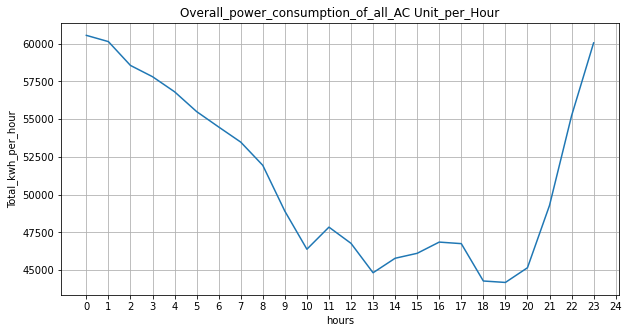

In [83]:
plt.figure(figsize=(10,5))
sns.lineplot(x="hours",y="Total_kwh_per_hour",data=hourly_sep_kwh)
plt.xticks(np.arange(0,25,1))
plt.grid()
plt.savefig('./Plots/hours_vs_Total_kwh_per_hour_September.jpg')
plt.title('Overall_power_consumption_of_all_AC Unit_per_Hour')

**6. Date wise w.r.t. total power consumption**

In [84]:
datewise_sep_kwh=df_sep.groupby('Date').sum().iloc[:,1:]

In [85]:
datewise_sep_kwh['Total_kwh_per_day']=datewise_sep_kwh.sum(axis=1)

Text(0.5, 1.0, 'Overall_power_consumption_of_all_AC Unit_per_day')

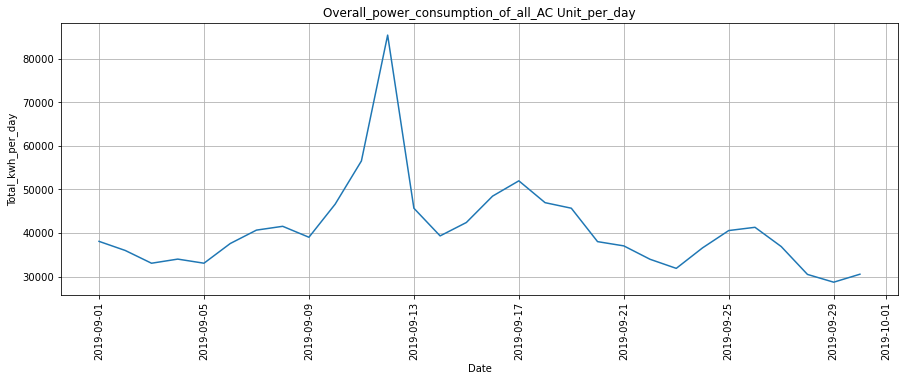

In [86]:
# sns.color_palette("hsl", 1)
plt.figure(figsize=(15,5))
sns.lineplot(x=datewise_sep_kwh.index,y="Total_kwh_per_day",data=datewise_sep_kwh)
# plt.xticks(np.arange(0,32,1))
plt.grid()
plt.xticks(rotation=90)
plt.savefig('./Plots/day_vs_Total_kwh_per_day_September.jpg')
plt.title('Overall_power_consumption_of_all_AC Unit_per_day')

### Minimum and Maximum Power consumed by AC unit

In [87]:
ac_df=datewise_sep_kwh.T.iloc[:-1,:]

In [88]:
ac_df['Total_kwh_by_AC']=ac_df.sum(axis=1)

In [89]:
ac_df['Total_kwh_by_AC'].sort_values(ascending=True).nsmallest(1)

AC 10    32344.08
Name: Total_kwh_by_AC, dtype: float64

In [90]:
ac_df['Total_kwh_by_AC'].sort_values(ascending=True).nlargest(1)

AC 18    141423.7
Name: Total_kwh_by_AC, dtype: float64

**Minimum Power consumed by: AC 10**

**Maximum Power consumed by: AC 18**

## Combining August and September Dataframe

In [91]:
df_aug2=df_aug.copy()
df_sep2=df_sep.copy()

In [92]:
df_aug2['Total_power']=round(df_aug2.iloc[:,5:].sum(axis=1),2)
df_sep2['Total_power']=round(df_sep2.iloc[:,5:].sum(axis=1),2)

In [93]:
df_aug2.head(2)

,Date,time,month,weekday,hours,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Total_power
0,2019-08-01,00:00:00,August,Thur,0,7.52,8.79,0.0,0.0,2.62,4.08,2.78,4.62,5.22,2.15,1.59,0.56,3.14,2.75,5.42,4.11,3.31,6.74,65.40
2,2019-08-01,00:02:00,August,Thur,0,7.43,8.94,0.0,0.0,2.58,3.78,2.53,5.06,5.35,2.41,2.17,1.82,3.09,2.72,3.30,3.99,3.22,6.38,64.77


In [94]:
df_sep2.head(2)

,Date,time,month,weekday,hours,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Total_power
0,2019-09-01,00:01:00,September,Sun,0,4.54,6.02,1.28,4.69,2.32,2.10,4.56,3.39,2.15,2.46,3.17,4.47,3.73,3.66,3.59,1.84,5.02,8.04,67.03
1,2019-09-01,00:03:00,September,Sun,0,4.51,5.98,1.93,5.11,2.08,1.92,3.72,4.00,2.54,2.47,3.10,4.43,3.75,3.65,3.57,2.36,5.00,8.02,68.14


In [95]:
df_combine=pd.concat([df_aug2,df_sep2])

In [96]:
df_combine=df_combine[['Date','Total_power']]

In [98]:
df_combine.reset_index(inplace=True)

In [100]:
df_combine.drop(columns='index',inplace=True)

In [102]:
df_combine=df_combine.groupby('Date')[['Total_power']].mean()

In [104]:
df_combine.reset_index(inplace=True)

In [151]:
df_combine.head(2)

,Date,Total_power
0,2019-08-01,63.449750
1,2019-08-02,59.716718


# **Q: Relate this power data with the outside temperature of Gurgaon. (Feel free to use temperature data from any website online. How will you fetch that data in your analysis?**

Source: https://www.visualcrossing.com/weather/weather-data-services/Gurgaon,%20India/metric/2021-08-01/2021-08-31

In [152]:
temp=pd.read_csv('Gurgaon.csv')

In [153]:
temp=temp[['datetime','temp']]

In [154]:
temp['datetime']=pd.to_datetime(temp['datetime'])

In [155]:
temp.insert(1,'Date',temp['datetime'].dt.date)

In [156]:
temp.drop(columns='datetime',inplace=True)

In [157]:
temp=temp.groupby('Date')[['temp']].mean()

In [158]:
temp.reset_index(inplace=True)

In [159]:
temp.drop(columns='Date',inplace=True)

In [160]:
df_final=pd.concat([df_combine,temp],axis=1)

In [162]:
df_final.head(2)

,Date,Total_power,temp
0,2019-08-01,63.449750,28.420833
1,2019-08-02,59.716718,28.625000


**# Temp trend w.r.t hours**

In [163]:
df_final.head(2)

,Date,Total_power,temp
0,2019-08-01,63.449750,28.420833
1,2019-08-02,59.716718,28.625000


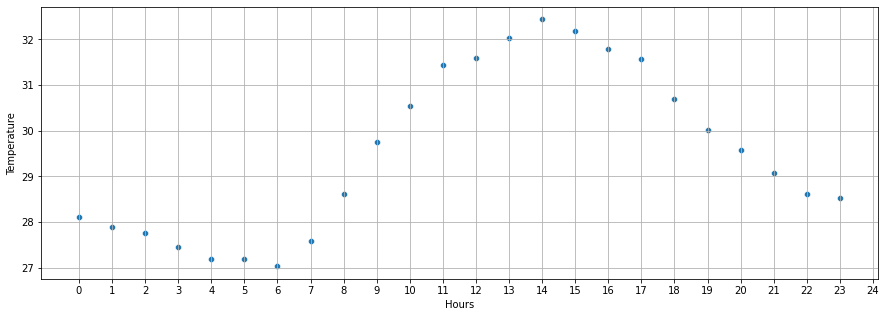

In [460]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="hours",y="temp",data=df_final)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.xticks(np.arange(0,25,1))
plt.savefig('./Plots/Temp_vs_Hours.jpg')
plt.show()

**1. Hour when temp is highest: At 14:00**

**2. Hour when temp is lowest: At 06:00**

**# Temp trend w.r.t. Total power consumed at respective hours**

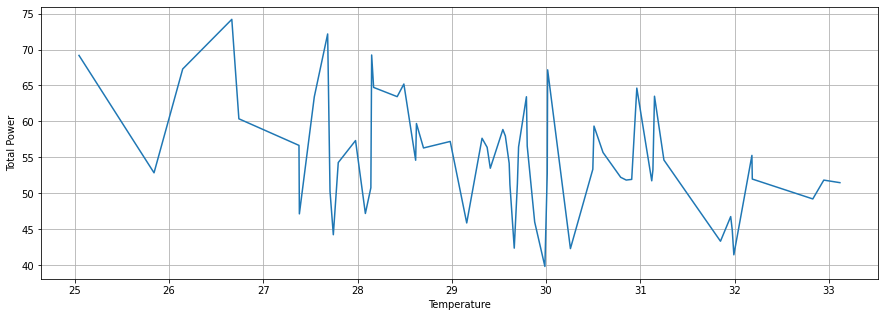

In [164]:
plt.figure(figsize=(15,5))
sns.lineplot(x="temp",y="Total_power",data=df_final)
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('Total Power')
# plt.xticks(np.arange(0,25,1))
plt.savefig('./Plots/Temp_vs_Total_power.jpg')
plt.show()

As such no Trend we can find in the plot between Temperature and Total power consumption at respective date

**# Temp trend w.r.t. at respective dates**

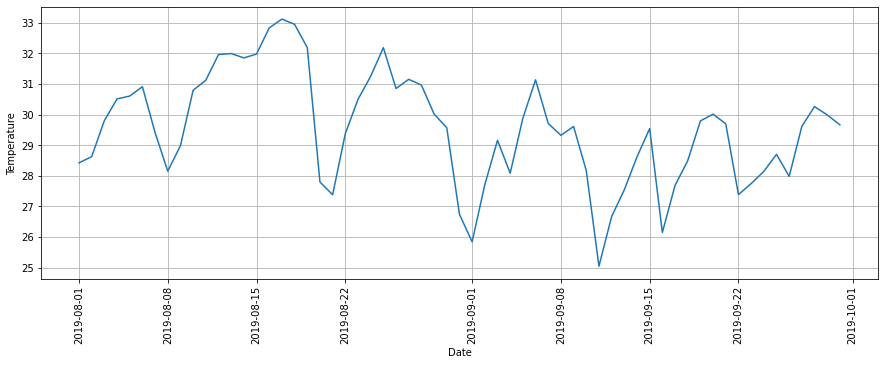

In [165]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Date",y="temp",data=df_final)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=90)
plt.savefig('./Plots/Temp_vs_Dates.jpg')
plt.show()

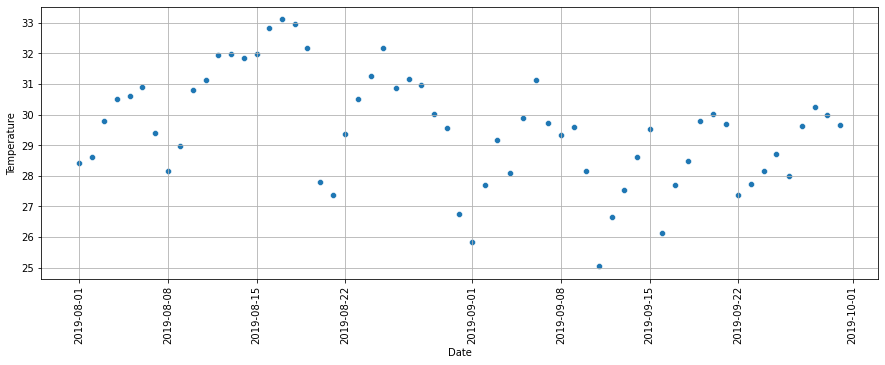

In [133]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Date",y="temp",data=df_final)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=90)
plt.savefig('./Plots/Temp_vs_Dates.jpg')
plt.show()

We see that there is no such linear trend between the temp and dates.

The reason may be the usage of the equipments. Based on the availability of the customers.

**1. Date when the temp was lowest**

In [134]:
df_final[['Date','temp']].nsmallest(1,columns=temp)

,Date,temp
41,2019-09-11,25.045833


**2. Date when the temp was highest**

In [135]:
df_final[['Date','temp']].nlargest(1,columns=temp)

,Date,temp
16,2019-08-17,33.116667


**# Power trend at respective temp**

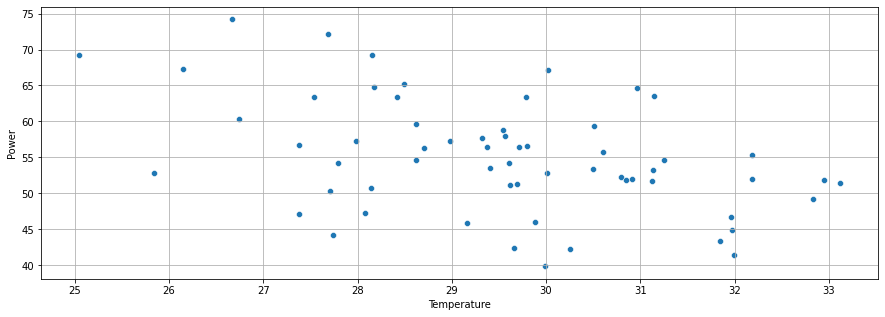

In [136]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="temp",y="Total_power",data=df_final)
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.savefig('./Plots/Temp_VS_Power.jpg')
plt.show()

We can observed that the most of the power consumption are between temp 29 degree celcius and 30 degree celcius

# **Q: Using the power data, predict/forecast the power consumption?**

**We will be taking the previous data which contain TIME/HOUR wise power consumption at respective mean temperature at that time**

**Here simple Machine Learning algorithms we will be using to predict the Power consumed**

**#Total Power Consumption | Hours**


In [147]:
data=pd.concat([df_aug2,df_sep2])

In [148]:
data=data.groupby('hours')[['Total_power']].mean()

**#Total Temperature | Hours**

In [166]:
t=pd.read_csv('Gurgaon.csv')

In [167]:
t=t[['datetime','temp']]

In [168]:
t['datetime']=pd.to_datetime(t['datetime'])

In [169]:
t.insert(1,'hours',t['datetime'].dt.hour)

In [170]:
t.drop(columns='datetime',inplace=True)

In [171]:
t=t.groupby('hours')[['temp']].mean()

In [172]:
data_mix=pd.concat([data,t],axis=1)

In [173]:
data_mix.reset_index(inplace=True)

In [174]:
data_mix.head()

,hours,Total_power,temp
0,0,62.559944,28.114754
1,1,61.869446,27.885246
2,2,60.997406,27.755738
3,3,60.212412,27.460656
4,4,59.691838,27.183333


**Above is the final dataset with the help of which we will be creating predicting model**

**Assuming the independent variables**:
    
    - hours: This is the individual time at which the power consumption by all the units are consumed.
    
    - temp: temp (in degree celcius). This is the outdoor temperature

**Dependent variable:**
    
    - Total_power: Total power consumed by all the unit at particular time period

Since we have very less data so model will not be robust.
Although we will try to increase the data by sampling techniques

**We will be using Regression model to predict the power consumption at particular Time**

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
import pickle

In [176]:
x=data_mix.drop(columns='Total_power')
y=data_mix['Total_power']

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [178]:
# std=StandardScaler()

In [179]:
# std_xtrain=std.fit_transform(x_train)
# std_xtest=std.transform(x_test)

In [180]:
# x_train = pd.DataFrame(std_xtrain, columns = [x.columns])

In [181]:
x_train=np.log(x_train+1)

In [182]:
x_test=np.log(x_test+1)

**1. Linear Regression**

In [183]:
ln=LinearRegression()
ln.fit(x_train,y_train)

LinearRegression()

**Training Score**

In [184]:
train_score=ln.score(x_train,y_train)
train_score

0.7295021136263449

**Prediction of x_test data**

In [185]:
pred=ln.predict(x_test)
pred

array([56.41531665, 50.19880542, 60.03387065, 51.86632754])

**Performance Check**

**i. R2 Score**

In [186]:
test_validation_score = round(r2_score(y_test,pred)*100,2)
test_validation_score

86.72

**ii. MAE**

In [187]:
mae=mean_absolute_error(y_test,pred)
mae=round(mae,2)
mae

1.65

**iii. RMSE**

In [188]:
rmse = np.sqrt(mae)
rmse = round(rmse,2)
rmse

1.28

**Checking the residual distribution**

In [189]:
errors=y_test-pred

<AxesSubplot:xlabel='Total_power', ylabel='Density'>

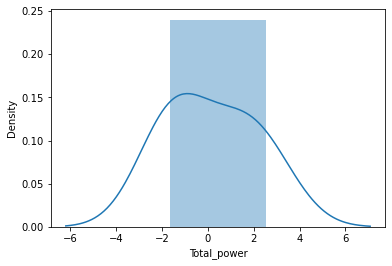

In [190]:
sns.distplot(errors)

Here we see that the Residual are almost forming Gaussian distribution. It means that model is fitted perfectly. However may be after some tunning and cross validation it will perform well

**2. Randomforest**

In [191]:
rf=RandomForestRegressor()

In [192]:
rf.fit(x_train,y_train)

RandomForestRegressor()

**Training score**

In [193]:
train_score_rf=rf.score(x_train,y_train)
train_score_rf

0.9769282278976176

**Prediction of unseen data i.e. x_test data**

In [194]:
pred_rf=rf.predict(x_test)
pred_rf

array([58.24798741, 51.498233  , 61.50822653, 51.03388497])

**Performance Check**

**i. R2 score**

In [195]:
validation_score_rf = round(r2_score(y_test,pred_rf)*100,2)
validation_score_rf

85.16

**ii. MAE**

In [196]:
mae = mean_absolute_error(y_test,pred_rf)
mae

1.3220150827481199

**iii. RMSE**

In [197]:
rmse = np.sqrt(mae)
rmse

1.1497891470822466

**Residual check**

In [198]:
errors_rf=y_test-pred_rf
errors_rf

8    -3.476131
16   -0.225883
0     1.051718
18   -0.534329
Name: Total_power, dtype: float64

<AxesSubplot:xlabel='Total_power', ylabel='Density'>

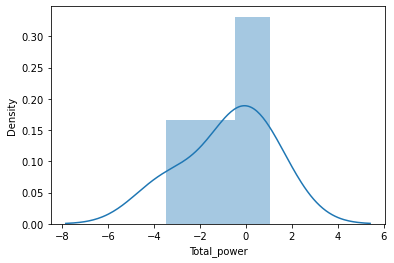

In [199]:
sns.distplot(errors_rf)

This is much better than the previous model.

Since the **R2_Score** and **RMSE** of **Linear Regression** is better than **Random Forest** model.

Hence we can say that **Linear Regression** is performing very well in this case

**Saving Model**

In [200]:
with open('randomforest.pickle','wb') as file:
    pickle.dump(rf,file)